In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
screen = pd.read_excel("ScreenTime.xlsx")
screentime =pd.DataFrame(data = screen)
screentime = screentime.rename(columns = {'Average phone screen time (in minutes)' : 'ScreenTime' , 'Average number of times you unlock your phone in a day':'Unlock'})
screentime

,Age,Gender,Unlock,ScreenTime
0,18,Female,20,180.0
1,56,Female,8,180.0
2,21,Male,150,200.0
3,22,Male,400,360.0
4,48,Male,50,240.0
...,...,...,...,...
662,45,Female,27,211.0
663,45,Female,24,125.0
664,45,Female,23,150.0
665,45,Female,18,126.0


In [3]:
screentime.shape

(667, 4)

In [4]:
screentime.drop(screentime[screentime["Age"]<5].index,inplace=True)
screentime.drop(screentime[screentime["Age"]>80].index,inplace=True)
screentime['ScreenTime'] = screentime['ScreenTime'].apply(lambda x: x*60 if x<=40 else x)
screentime.drop(screentime[screentime["ScreenTime"]>1440].index,inplace=True)
screentime.drop(screentime[screentime["Gender"]== "Prefer not to say"].index,inplace=True)
screentime.drop(screentime[screentime["Gender"]== "Other"].index,inplace=True)

In [5]:
screentime.shape

(632, 4)

In [6]:
def new_age(x) :
    if x<18 :
        return "A"
    elif x<24 :
        return "B"
    elif x<60 :
        return "C"
    else :
        return "D"
screentime["New_Age"]= screentime['Age'].apply(new_age)
screentime

,Age,Gender,Unlock,ScreenTime,New_Age
0,18,Female,20,180.0,B
1,56,Female,8,180.0,C
2,21,Male,150,200.0,B
3,22,Male,400,360.0,B
4,48,Male,50,240.0,C
...,...,...,...,...,...
662,45,Female,27,211.0,C
663,45,Female,24,125.0,C
664,45,Female,23,150.0,C
665,45,Female,18,126.0,C


In [7]:
screentimeVSage= screentime.groupby(['New_Age']).mean()
screentimeVSgender= screentime.groupby(['Gender']).mean()
print(screentimeVSage)
print(screentimeVSgender)

               Age     Unlock  ScreenTime
New_Age                                  
A        16.160000  69.280000  308.920000
B        19.821678  62.716783  360.611888
C        44.600791  40.948617  220.549407
D        70.833333  30.833333  222.944444
              Age     Unlock  ScreenTime
Gender                                  
Female  28.070833  36.708333  286.791667
Male    32.405612  64.382653  299.198980


Text(0, 0.5, 'Screentime')

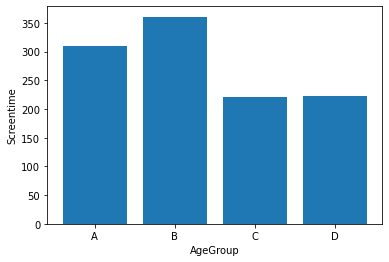

In [8]:
plt.bar(screentimeVSage.index,screentimeVSage["ScreenTime"])
plt.xlabel("AgeGroup")
plt.ylabel("Screentime")

Text(0, 0.5, 'Screentime')

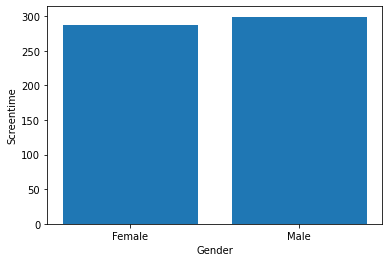

In [9]:
plt.bar(screentimeVSgender.index,screentimeVSgender["ScreenTime"])
plt.xlabel("Gender")
plt.ylabel("Screentime")

In [10]:
screentime = screentime.drop(['New_Age'], axis=1)
screentime

,Age,Gender,Unlock,ScreenTime
0,18,Female,20,180.0
1,56,Female,8,180.0
2,21,Male,150,200.0
3,22,Male,400,360.0
4,48,Male,50,240.0
...,...,...,...,...
662,45,Female,27,211.0
663,45,Female,24,125.0
664,45,Female,23,150.0
665,45,Female,18,126.0


In [14]:
def female(x) :
    if x=="Male" :
        return "0"
    else :
        return "1"
screentime["Female"]= screentime['Gender'].apply(female)
screentime = screentime.drop(['Gender'], axis=1)
screentime


,Age,Unlock,ScreenTime,Female
0,18,20,180.0,1
1,56,8,180.0,1
2,21,150,200.0,0
3,22,400,360.0,0
4,48,50,240.0,0
...,...,...,...,...
662,45,27,211.0,1
663,45,24,125.0,1
664,45,23,150.0,1
665,45,18,126.0,1


In [15]:
screentime.isnull().sum()

Age           0
Unlock        0
ScreenTime    0
Female        0
dtype: int64

In [16]:
x = np.array(screentime.drop("ScreenTime",axis=1))
y = np.array(screentime[["ScreenTime"]])
print(x,y)

[[18 20 '1']
 [56 8 '1']
 [21 150 '0']
 ...
 [45 23 '1']
 [45 18 '1']
 [45 16 '1']] [[ 180.]
 [ 180.]
 [ 200.]
 [ 360.]
 [ 240.]
 [ 240.]
 [ 300.]
 [ 180.]
 [ 120.]
 [ 150.]
 [  90.]
 [ 250.]
 [  60.]
 [ 180.]
 [ 300.]
 [ 120.]
 [ 160.]
 [ 330.]
 [  90.]
 [ 150.]
 [ 250.]
 [ 120.]
 [ 120.]
 [ 240.]
 [ 480.]
 [ 360.]
 [ 600.]
 [ 270.]
 [ 120.]
 [ 360.]
 [1200.]
 [ 240.]
 [ 120.]
 [  90.]
 [ 360.]
 [  90.]
 [ 600.]
 [  60.]
 [  50.]
 [ 120.]
 [ 120.]
 [ 450.]
 [ 250.]
 [ 420.]
 [ 180.]
 [  60.]
 [ 250.]
 [ 200.]
 [ 200.]
 [ 180.]
 [ 300.]
 [  60.]
 [ 150.]
 [  30.]
 [ 360.]
 [  90.]
 [ 432.]
 [  60.]
 [ 600.]
 [ 450.]
 [ 250.]
 [ 480.]
 [ 480.]
 [  75.]
 [ 900.]
 [  60.]
 [ 150.]
 [ 180.]
 [ 360.]
 [ 100.]
 [ 100.]
 [ 240.]
 [ 360.]
 [ 300.]
 [ 400.]
 [ 120.]
 [ 300.]
 [ 120.]
 [ 180.]
 [  90.]
 [ 180.]
 [ 240.]
 [ 125.]
 [ 300.]
 [ 360.]
 [ 400.]
 [ 200.]
 [ 300.]
 [ 120.]
 [ 480.]
 [ 300.]
 [ 200.]
 [ 300.]
 [ 200.]
 [ 180.]
 [ 120.]
 [ 286.]
 [ 180.]
 [ 180.]
 [ 360.]
 [ 120.]
 [ 150.

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1 , random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(568, 3)
(568, 1)
(64, 3)
(64, 1)


In [19]:
x_train = x_train.reshape(x_train.shape[0],-1).T
x_test =  x_test.reshape(x_test.shape[0],-1).T
y_train = y_train.reshape(y_train.shape[0],-1).T
y_test = y_test.reshape(y_test.shape[0],-1).T
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3, 568)
(1, 568)
(3, 64)
(1, 64)


In [20]:
def model(x,y,dim,learning_rate):
    w = np.zeros((dim,1))
    b = 0.0

    m = x.shape[1]
    A = np.dot(w.T,x)+b
    cost = (1/(m))*np.sum((A-y)**2)

    dz = (1/m)*(A-y)
    dw = np.dot(x,dz.T)
    db = np.sum(dz)

    costs = []

    for i in range (200):
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
    
        if i%1000 == 0:
            costs.append(cost)
        
    parameters = {"w":w,"b":b}
    gradients = {"dw":dw,"db":db}
    
    return parameters, gradients, cost

In [21]:
parameters, gradients, cost = model(x_train,y_train,3,0.001)

In [22]:
print (cost)

0.9557045612551991


In [23]:
def pred (w,b,x):
    m = x.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(x.shape[0],1)
    
    y_pred = np.dot(w.T,x)+b
    
    return y_pred

In [24]:
w = parameters["w"]
b = parameters["b"]

print (w)
print (b)

[[-0.05894143]
 [ 0.02693187]
 [-0.00405095]]
-0.0001474697605688333


In [25]:
y_pred_test = pred(w,b,x_test)
y_pred_train = pred(w,b,x_train)

In [26]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_pred_test)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.1675029765676712


In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_test)

0.7696534300723852